In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('/home/rayan/Downloads/online+retail/Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df = df.dropna(subset=['CustomerID'])
df['CustomerID'] = df['CustomerID'].astype(int)


In [8]:
df.duplicated().sum()

np.int64(5268)

In [9]:
df.drop_duplicates(inplace=True)

In [16]:
negative_total = (df['Quantity'] < 0).sum()
negative_total


np.int64(0)

In [17]:
df = df[df['Quantity'] > 0]


In [12]:
negative_pric= (df['UnitPrice'] < 0).sum()
negative_pric

np.int64(2)

In [18]:
df = df[df['UnitPrice'] > 0]


In [14]:
df['Country'].value_counts()

Country
United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [4]:
df.to_csv('/home/rayan/Downloads/Online_Retail_clean.csv', index=False)


NameError: name 'df' is not defined

In [20]:
df['Sales'] = df['Quantity'] * df['UnitPrice']


In [5]:
df=pd.read_csv('/home/rayan/Downloads/Online_Retail_clean.csv')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [7]:
df['Sales'].describe()

count    534131.000000
mean         21.639288
std         381.368410
min           0.001000
25%           3.900000
50%           9.920000
75%          17.700000
max      168469.600000
Name: Sales, dtype: float64

In [8]:
customer_sales = df.groupby('CustomerID')['Sales'].sum().sort_values(ascending=False)
customer_sales.head(10) 



CustomerID
No CustomerID    2062316.29
16446.0           336942.10
14646.0           280923.02
18102.0           262876.11
17450.0           201459.41
14911.0           154963.61
12346.0           154367.20
12415.0           126103.61
14156.0           121205.57
16029.0           108532.99
Name: Sales, dtype: float64

<Axes: title={'center': 'Monthly Sales Over Time'}, xlabel='InvoiceDate'>

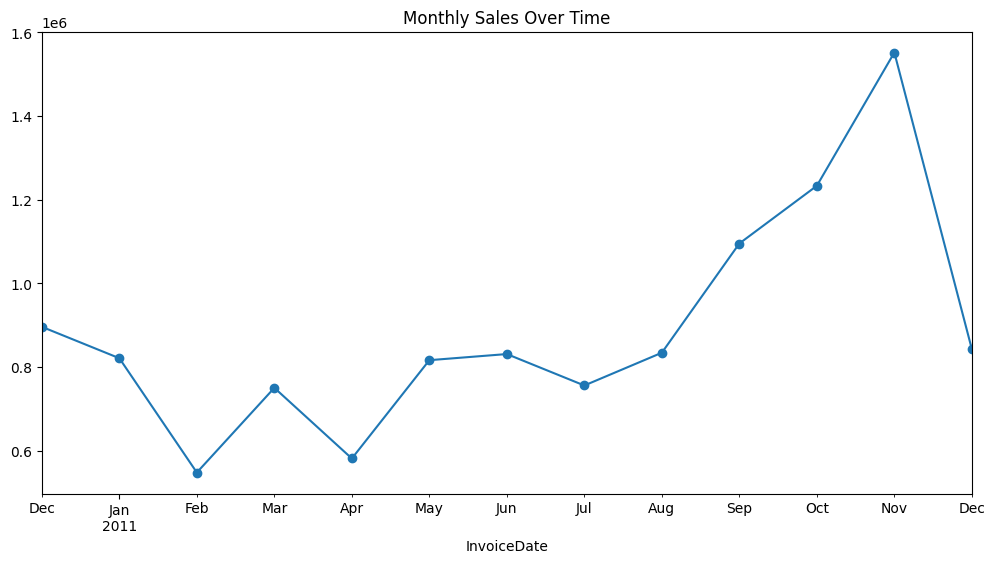

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


df['InvoiceDate'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceDate')['Sales'].sum()
monthly_sales.plot(kind='line', figsize=(12,6), marker='o', title='Monthly Sales Over Time')


In [10]:
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
country_sales.head(10)


Country
United Kingdom    9836360.004
EIRE               303287.660
Netherlands        286231.140
Germany            235847.330
France             221933.630
Australia          139897.850
Spain               68361.090
Switzerland         57772.150
Belgium             41481.720
Sweden              40150.250
Name: Sales, dtype: float64

In [11]:
df['InvoiceDate'] = df['InvoiceDate'].dt.to_timestamp()

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
snapshot_date


Timestamp('2011-12-02 00:00:00')

In [12]:
rfm = (
    df.groupby('CustomerID')
      .agg({
          'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
          'InvoiceNo': 'nunique',
          'Sales': 'sum'
      })
)

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,335,2,154367.20
12347.0,1,7,4310.00
12348.0,92,4,1797.24
12349.0,31,1,1757.55
12350.0,304,1,334.40


In [13]:
rfm['R_score'] = pd.qcut(
    rfm['Recency'].rank(method='first'),
    5,
    labels=[5,4,3,2,1]
)

rfm['F_score'] = pd.qcut(
    rfm['Frequency'].rank(method='first'),
    5,
    labels=[1,2,3,4,5]
)

rfm['M_score'] = pd.qcut(
    rfm['Monetary'].rank(method='first'),
    5,
    labels=[1,2,3,4,5]
)



In [14]:
rfm['RFM_Segment'] = (
    rfm['R_score'].astype(str) +
    rfm['F_score'].astype(str) +
    rfm['M_score'].astype(str)
)

rfm.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment
CustomerID,,,,,,,
12346.0,335,2,154367.20,1,2,5,125
12347.0,1,7,4310.00,5,4,5,545
12348.0,92,4,1797.24,3,3,4,334
12349.0,31,1,1757.55,5,1,4,514
12350.0,304,1,334.40,1,1,2,112


In [15]:
rfm['RFM_Score'] = (
    rfm[['R_score','F_score','M_score']]
    .astype(int)
    .sum(axis=1)
)

rfm.sort_values('RFM_Score', ascending=False).head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
18245.0,1,8,2626.56,5,5,5,555,15
12352.0,31,11,3466.67,5,5,5,555,15
No CustomerID,1,1612,2062316.29,5,5,5,555,15
18225.0,1,17,5653.06,5,5,5,555,15
18223.0,1,27,6653.85,5,5,5,555,15


In [ ]:
monthly_sales = (
    df.groupby('InvoiceMonth')['Sales']
      .sum()
      .reset_index()
)

monthly_sales.head()


,InvoiceMonth,Sales
0,2010-12-01,896181.850
1,2011-01-01,821174.660
2,2011-02-01,548064.710
3,2011-03-01,750416.540
4,2011-04-01,581569.141


<Axes: title={'center': 'Sales vs 3-Month Moving Average'}>

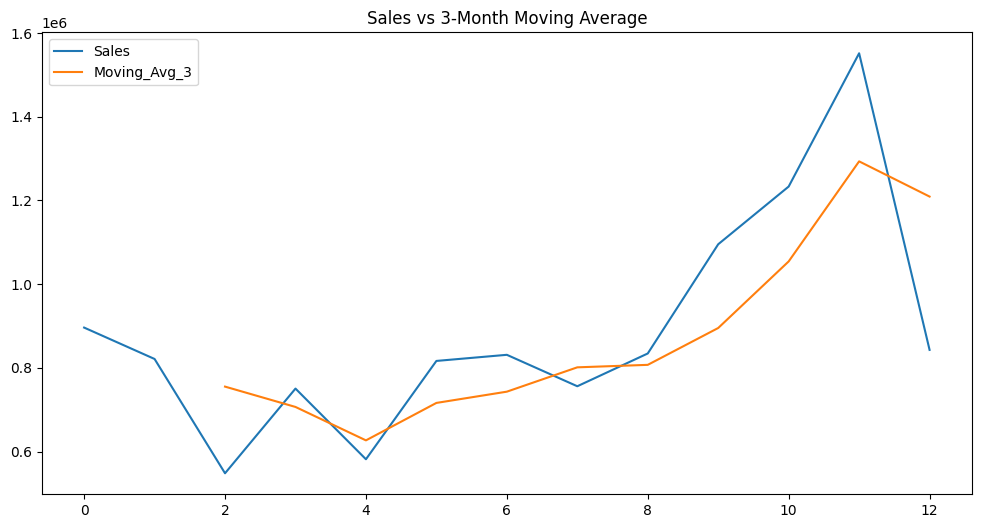

In [19]:
monthly_sales['Moving_Avg_3'] = (
    monthly_sales['Sales']
    .rolling(window=3)
    .mean()
)

monthly_sales[['Sales', 'Moving_Avg_3']].plot(
    figsize=(12,6),
    title='Sales vs 3-Month Moving Average'
)


<Axes: title={'center': 'Sales Forecast with Linear Regression'}, xlabel='InvoiceMonth'>

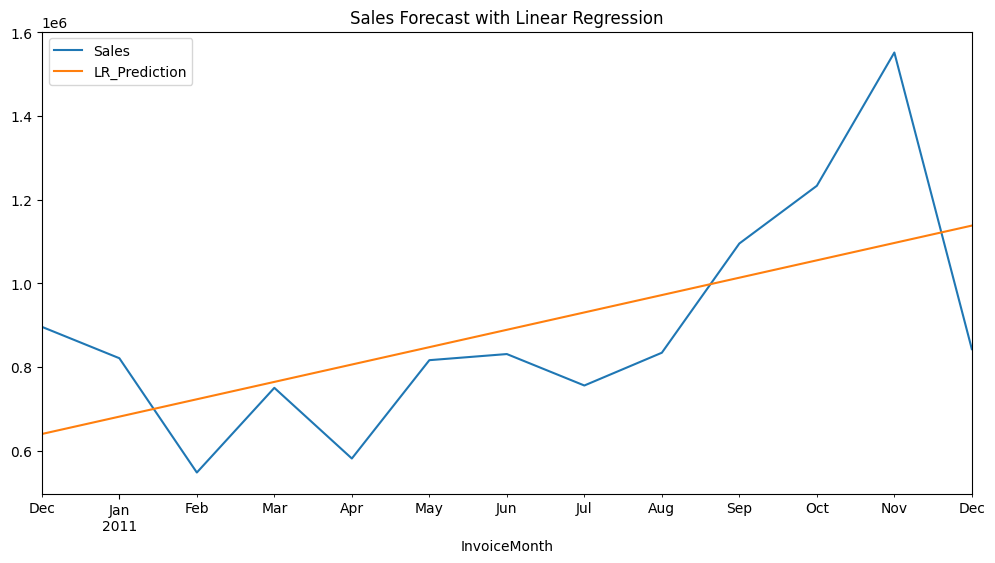

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

monthly_sales['t'] = np.arange(len(monthly_sales))

X = monthly_sales[['t']]
y = monthly_sales['Sales']

model = LinearRegression()
model.fit(X, y)

monthly_sales['LR_Prediction'] = model.predict(X)

monthly_sales.set_index('InvoiceMonth')[['Sales', 'LR_Prediction']].plot(
    figsize=(12,6),
    title='Sales Forecast with Linear Regression'
)


In [21]:
next_t = [[monthly_sales['t'].max() + 1]]
next_month_sales = model.predict(next_t)

next_month_sales


/home/rayan/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1179560.82011538])